# Quantum Machine Learning  | project
---

### **Description**:
Pulsars are highly magnetized, rotating neutron stars that emit beams of electromagnetic radiation. It can be said that they are amongst the most exotic objects in the universe, their research can provide some crucial insights into fundamental physics. It could also help with better understanding of galaxies and black holes formation.

However, distinguishing pulsar stars from other sources of radiation is a challenging task. Machine learning algorithms can be used for this purpose with some success, but quantum machine learning techniques may offer significant advantages in terms of speed and accuracy. In this project, I aim to explore the use of quantum ML for pulsar star classification. I will use qiskit's quantum-inspired algorithms to train models on large datasets provided by kaggle, and evaluate their performance against classical machine learning algorithms. Then I can potentially speculate quantum advantage.

---

## **Part 0: Importing frameworks**

In [2]:
from qiskit import IBMQ
IBMQ.save_account('c9eada75355d7fedf8509e23801af0f58f8b1c79084a27f89e1698e06043607805f92f16f24f2d416c42c474f94405a4c75b607df20696921dc7fa7bee983165')
# Loading IBM Quantum account
provider = IBMQ.load_account()

C:\Users\e u n o i a\AppData\Local\Temp\ipykernel_732\1255116430.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('c9eada75355d7fedf8509e23801af0f58f8b1c79084a27f89e1698e06043607805f92f16f24f2d416c42c474f94405a4c75b607df20696921dc7fa7bee983165')
configrc.store_credentials:WARNING:2023-03-24 18:11:42,855: Credentials already present. Set overwrite=True to overwrite.


In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes

from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms import PegasosQSVC
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import BasicAer
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler
from qmeans import qkmeans
from qiskit import IBMQ
from qiskit import Aer
from qiskit.circuit.library import ZGate

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [3]:
pulsar = pd.read_csv("C:/Users/e u n o i a/Downloads/pulsar_data_train.csv")

## **Part 1: Data analysis**

In [4]:
pulsar

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [5]:
pulsar.shape

(12528, 9)

In [6]:
pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [7]:
pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [8]:
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [9]:
pulsar.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

## **Part 2: Data visualisation**

<AxesSubplot:xlabel='target_class', ylabel='count'>

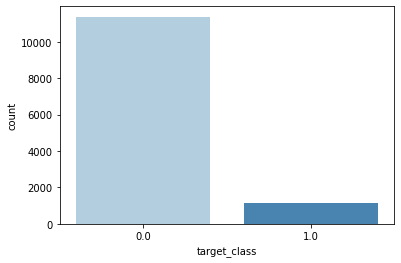

In [10]:
sns.countplot(x=pulsar["target_class"], palette="Blues")

there is a big problem involving small data source of pulsar star

<AxesSubplot:xlabel='target_class', ylabel=' Mean of the integrated profile'>

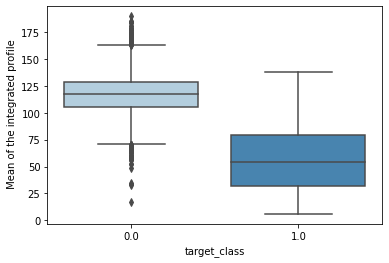

In [11]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Mean of the integrated profile"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Standard deviation of the integrated profile'>

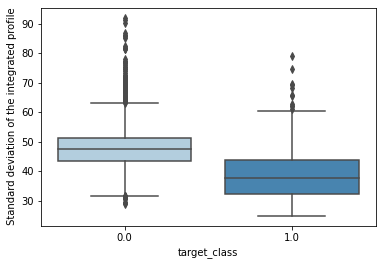

In [12]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Standard deviation of the integrated profile"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Excess kurtosis of the integrated profile'>

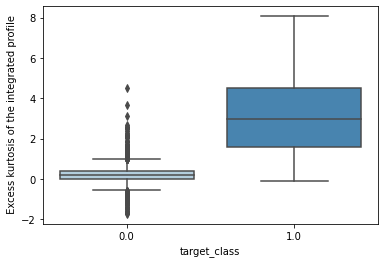

In [13]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Excess kurtosis of the integrated profile"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Skewness of the integrated profile'>

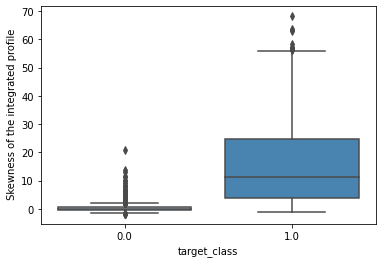

In [14]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Skewness of the integrated profile"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Mean of the DM-SNR curve'>

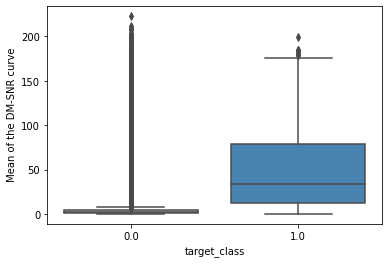

In [15]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Mean of the DM-SNR curve"], palette="Blues")

visualisation helps to see how different these stars are what helps with classification

## **Part 3: Classical model training**

In [18]:
scoring = "accuracy"
results =[]
names=[]
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
models.append(("DTR", DecisionTreeRegressor()))
models 

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('DTR', DecisionTreeRegressor())]

In [19]:
pulsar=pulsar.dropna()
array = pulsar.values
X = array[:,0:8]
Y = array[:,8]
X=X.astype('float')

In [20]:
validation_size = 0.015
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = 771)

In [21]:
mod = SVC()
mod.fit(X_train,Y_train)
pred = mod.predict(X_test)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0.])

In [22]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [23]:
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 73) #splitting data on 10 parts
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:%f(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR:0.978211(0.002610)
LDA:0.975145(0.003762)
KNN:0.977225(0.003351)
CART:0.964415(0.005300)
NB:0.943721(0.004035)
SVM:0.977883(0.002534)
DTR:0.964196(0.004323)


## **Part 4: Report**

In [24]:
report = classification_report(Y_test,pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       133
         1.0       0.86      0.86      0.86         7

    accuracy                           0.99       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.99      0.99      0.99       140



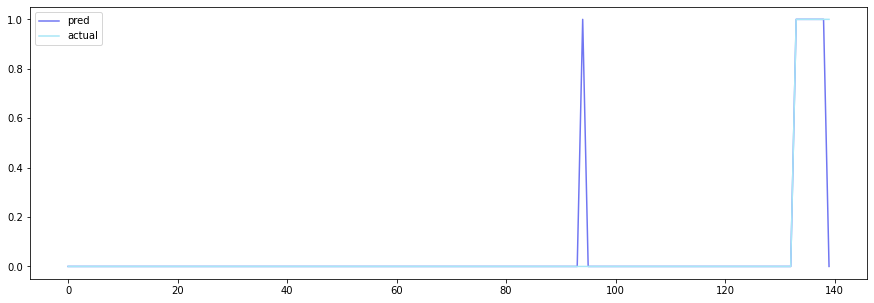

In [25]:
preds = pd.DataFrame({'y_pred': pred, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', color="#7076f2")
plt.plot(preds['y_test'], label='actual', color="#a8e7f7")
plt.legend()
plt.show()

## **Part 5: Quantum SVM**

---
this model is one of the most popular and researched one from whole quantum-inspired machine learning branch

source
https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.algorithms.PegasosQSVC.html

### **2 dimensions**:

In [30]:
algorithm_globals.random_seed = 123

feature_map = ZFeatureMap(feature_dimension=2, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [31]:
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=1000, num_steps=100)

pegasos_qsvc.fit(X_train, Y_train)

In [32]:
pred = pegasos_qsvc.predict(X_test)

In [34]:
pegasos_score = pegasos_qsvc.score(X_test, Y_test)
print(f"PegasosQSVC classification test score: {pegasos_score}")

PegasosQSVC classification test score: 0.95


In [35]:
report = classification_report(Y_test,pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       133
         1.0       0.00      0.00      0.00         7

    accuracy                           0.95       140
   macro avg       0.47      0.50      0.49       140
weighted avg       0.90      0.95      0.93       140



c:\Users\e u n o i a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\e u n o i a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\e u n o i a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

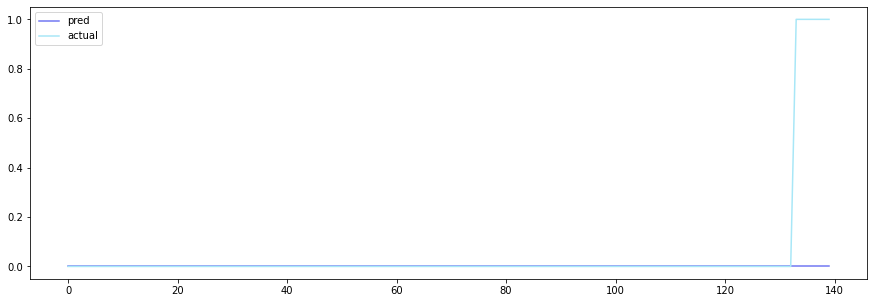

In [36]:
preds = pd.DataFrame({'y_pred': pred, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', color="#7076f2")
plt.plot(preds['y_test'], label='actual', color="#a8e7f7")
plt.legend()
plt.show()

quantum model did worse than any classical - this dataset was really hard as there was not many pusar ( 1 ) data. 

### **4 dimensions**:

In [42]:
algorithm_globals.random_seed = 123

feature_map = ZFeatureMap(feature_dimension=8, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

In [43]:
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=1000, num_steps=100)

pegasos_qsvc.fit(X_train, Y_train)

In [44]:
pred = pegasos_qsvc.predict(X_test)

In [45]:
report = classification_report(Y_test,pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       133
         1.0       0.00      0.00      0.00         7

    accuracy                           0.95       140
   macro avg       0.47      0.50      0.49       140
weighted avg       0.90      0.95      0.93       140



c:\Users\e u n o i a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\e u n o i a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\e u n o i a\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

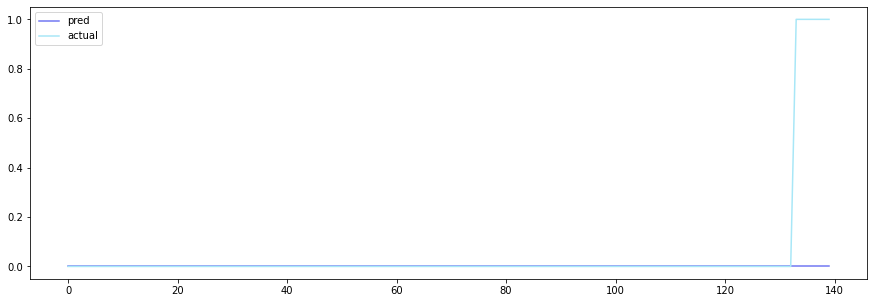

In [46]:
preds = pd.DataFrame({'y_pred': pred, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', color="#7076f2")
plt.plot(preds['y_test'], label='actual', color="#a8e7f7")
plt.legend()
plt.show()

##  Quantum KNN
---

## **Part 1: encoding**

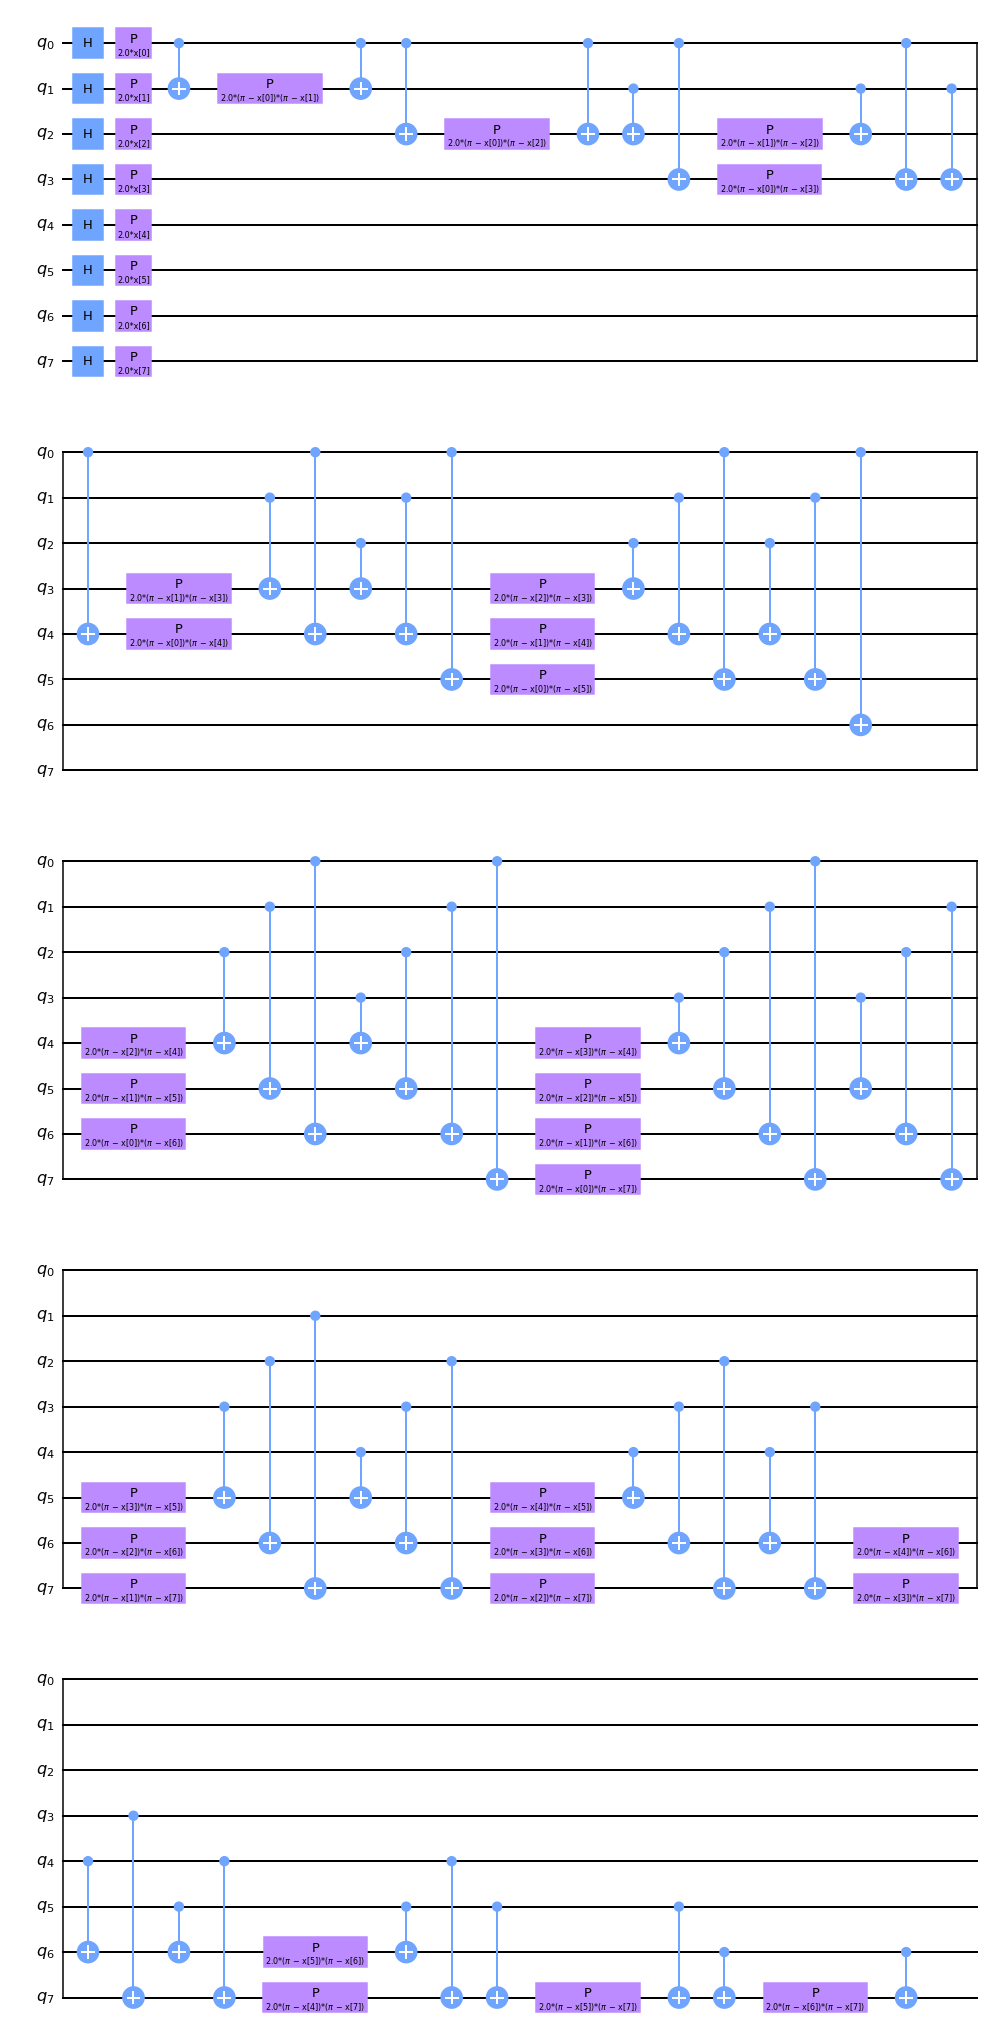

In [44]:
from qiskit.circuit.library import ZZFeatureMap
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(X_train)
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

Even though my code did not finally work I decided it is valuable to see its quantum circuit

In [45]:
from qiskit.primitives import Sampler

sampler = Sampler()
objective_func_vals = []


In [46]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [47]:
from IPython.display import clear_output
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

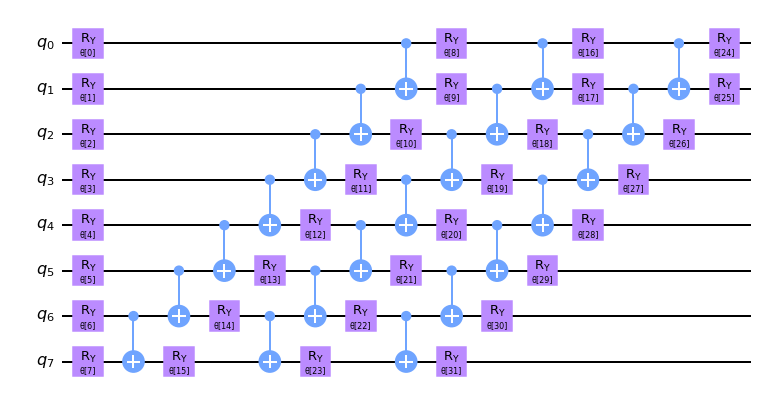

In [48]:

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [49]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

In [50]:
# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(X_train, X_test)

source: https://qiskit.org/documentation/machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html

the model isn't working at all

---

There are many possible uses of quantum machine learning such as molecule simulation or error correction. However, at the stage we are right now creating quantum models has huge challenges such as optimisation or building circuit. This code didn't show any quantum advantage as the time taken was quadratically smaller than classical and accuracy didn't show any improvement. There aren't many models ready to use as most of the ideas wasn't proven to work in this code. 